In [1]:
import pandas as pd
import numpy as np
import networkx as nx

In [2]:
df_anime = pd.read_csv("./datasets/anime_sort.csv")
df_anime = df_anime.loc[df_anime["anime_id"] < 6800] # Ignorando animes com Ids maiores que 5000

In [3]:
df_anime_sorted = df_anime.sort_values(by=["anime_id"])
df_anime_sorted

,anime_id,name,genre,type,episodes,rating,members
22,0,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824
152,1,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space",Movie,1,8.40,137636
214,2,Trigun,"Action, Comedy, Sci-Fi",TV,26,8.32,283069
2095,3,Witch Hunter Robin,"Action, Drama, Magic, Mystery, Police, Superna...",TV,26,7.36,64905
3159,4,Beet the Vandel Buster,"Adventure, Fantasy, Shounen, Supernatural",TV,52,7.06,9848
...,...,...,...,...,...,...,...
3367,6795,Fate/Prototype,"Action, Fantasy, Magic, Romance, Shounen, Supe...",OVA,1,7.01,43469
6487,6796,Himitsu no Akko-chan (Movie),"Magic, School, Shoujo",Movie,1,6.09,228
5827,6797,Itsuka Tenma no Kuro Usagi Picture Drama,"Comedy, Ecchi, Romance, Shounen, Supernatural,...",Special,6,6.34,3463
5710,6798,Asa made Jugyou Chu!,"Comedy, Ecchi, Romance, School",OVA,1,6.37,25285


In [4]:
lista = []
for index,row in df_anime_sorted.iterrows():
    celula = []
    celula.append(row["anime_id"])
    celula.append(row["genre"])
    lista.append(celula)

In [5]:
# Reduzir o tamanho dos dados, a fim de obter resultados mais rápidos
df_user = pd.read_csv("./datasets/rating_sort.csv")
df_user = df_user[:10000]
df_user = df_user.loc[df_user["anime_id"] < 6800]
df_user

,user_id,anime_id,rating
0,1,10,-1
1,1,14,-1
2,1,58,-1
3,1,202,-1
4,1,217,-1
...,...,...,...
9741,123,6747,9
9742,123,6763,8
9743,123,6765,10
9744,123,6778,7


In [6]:
def sort_dicio(dicionario):
    dicio_sorted = {}
    for i in sorted(dicionario, key = dicionario.get, reverse = True):
        dicio_sorted[i] = dicionario[i]
    return dicio_sorted

In [7]:
# Criar um dicionário de preferências
lista_quantidade = {} # Dicionário com as preferências
lista_gen = list()
lista_dicionarios = [] # Vetor de preferências de cada usuário
anterior = 1
for index,row in df_user.iterrows(): # itera sobre todas as colunas
    if (row["user_id"] != anterior): # se mudar o usuário, alterar o dicionário de preferência
        lista_dicionarios.append(sort_dicio(lista_quantidade))
        lista_quantidade = {}
        lista_gen = list()
        anterior = row["user_id"]
    valores = (lista[row["anime_id"]][1]).split(', ')
    for elem in valores: # verifica todos os generos splitados
        if not elem in lista_gen: # verifica se o gênero é novo
            lista_gen.append(elem)
            valor = 1
            lista_quantidade[elem] = valor 
        else: # Se o gênero não é novo, incrementa uma unidade de repetição
            valor = lista_quantidade[elem]
            valor += 1
            lista_quantidade.update({elem: valor})
lista_dicionarios.append(sort_dicio(lista_quantidade))

In [8]:
# Organização dos dados em ordem alfabética
import operator
max_values = {}
max_values['0'] = '0'
i = 0
while i < len(lista_dicionarios):
    valor = str(i + 1)
    max_values[valor] = max(lista_dicionarios[i].items(), key=operator.itemgetter(1))[0]
    i += 1

In [9]:
values_sorted = sort_dicio(max_values)
values_sorted

{'6': 'Supernatural',
 '25': 'Supernatural',
 '66': 'Supernatural',
 '100': 'Supernatural',
 '42': 'Shoujo Ai',
 '70': 'Sci-Fi',
 '103': 'Sci-Fi',
 '115': 'Sci-Fi',
 '2': 'School',
 '37': 'School',
 '119': 'School',
 '14': 'Romance',
 '53': 'Romance',
 '63': 'Romance',
 '79': 'Romance',
 '83': 'Romance',
 '91': 'Romance',
 '112': 'Romance',
 '84': 'Fantasy',
 '92': 'Fantasy',
 '11': 'Drama',
 '16': 'Drama',
 '19': 'Drama',
 '74': 'Drama',
 '99': 'Drama',
 '106': 'Drama',
 '111': 'Drama',
 '1': 'Comedy',
 '5': 'Comedy',
 '7': 'Comedy',
 '9': 'Comedy',
 '17': 'Comedy',
 '18': 'Comedy',
 '20': 'Comedy',
 '22': 'Comedy',
 '23': 'Comedy',
 '24': 'Comedy',
 '26': 'Comedy',
 '27': 'Comedy',
 '29': 'Comedy',
 '32': 'Comedy',
 '34': 'Comedy',
 '36': 'Comedy',
 '39': 'Comedy',
 '40': 'Comedy',
 '45': 'Comedy',
 '46': 'Comedy',
 '47': 'Comedy',
 '50': 'Comedy',
 '52': 'Comedy',
 '54': 'Comedy',
 '57': 'Comedy',
 '64': 'Comedy',
 '65': 'Comedy',
 '78': 'Comedy',
 '80': 'Comedy',
 '86': 'Comedy',
 

In [10]:
G = nx.Graph()

In [11]:
i = 0
cont = 0
nodes = []
for elem in values_sorted:
    genero_atual = values_sorted[elem]
    if (i == 0): # primeira atualização de anterior2
        genero_anterior = genero_atual
        i += 1
    if (genero_atual != genero_anterior): # se os generos forem diferentes
        cont = 1
        nodes = []
        nodes.append(elem)
        G.add_node(elem)
    else: # Se os generos forem iguais
        cont += 1
        nodes.append(elem)
        G.add_node(elem)
        if (cont >= 2):
            j = 0
            while j < len(nodes): # Adiciona as arestas
                G.add_edge(nodes[j],elem)
                j += 1
    genero_anterior = genero_atual

In [12]:
subgrafos = [G.subgraph(s) for s in nx.connected_components(G)]

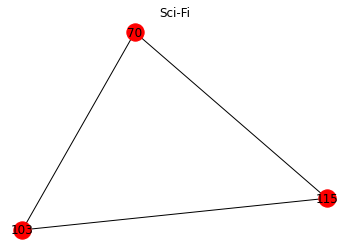

In [19]:
import matplotlib.pyplot as plt

indice = 2 # Indica qual comunidade deseja visualizar
node1 = 0
for valores in subgrafos[indice].nodes:
    node1 = valores
    ax = plt.gca()
    ax.set_title(values_sorted[str(node1)])
    node_size = 300

nx.draw(subgrafos[indice],       # subgrafo na posição 0
    with_labels=True,   # mostrar rótulos
    node_size= node_size,      # aumentar tamanho
    node_color='red',    # cor vermelha
    ax = ax
    )